## EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_path = "/content/drive/MyDrive/CSE_712_Project/dataset/olid-training-v1.0.tsv"

data = pd.read_csv(data_path, sep='\t')
data[:5]

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [ ]:
data.shape

(13240, 5)

In [ ]:
subtask_a = data['subtask_a'].value_counts()
subtask_a

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [ ]:
subtask_b = data['subtask_b'].value_counts()
subtask_b

TIN    3876
UNT     524
Name: subtask_b, dtype: int64

In [ ]:
data[data['subtask_a'] == 'NOT'].head(10)

,id,tweet,subtask_a,subtask_b,subtask_c
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
10,82776,@USER @USER @USER It’s not my fault you suppor...,NOT,NaN,NaN
11,42992,@USER What’s the difference between #Kavanaugh...,NOT,NaN,NaN
13,54920,@USER @USER @USER It should scare every Americ...,NOT,NaN,NaN
14,56392,@USER @USER @USER @USER @USER @USER @USER @USE...,NOT,NaN,NaN
15,86735,@USER you are also the king of taste,NOT,NaN,NaN
16,95686,#MAGA @USER 🎶 Sing like no one is listening ...,NOT,NaN,NaN
17,71446,5/5: @USER The time is right for this House to...,NOT,NaN,NaN


In [ ]:
#Exploring the olid data
data["tweet"][3]

'@USER Someone should\'veTaken" this piece of shit to a volcano. 😂"'

## Class distribution

Text(0.5, 0.98, 'Class distribution')

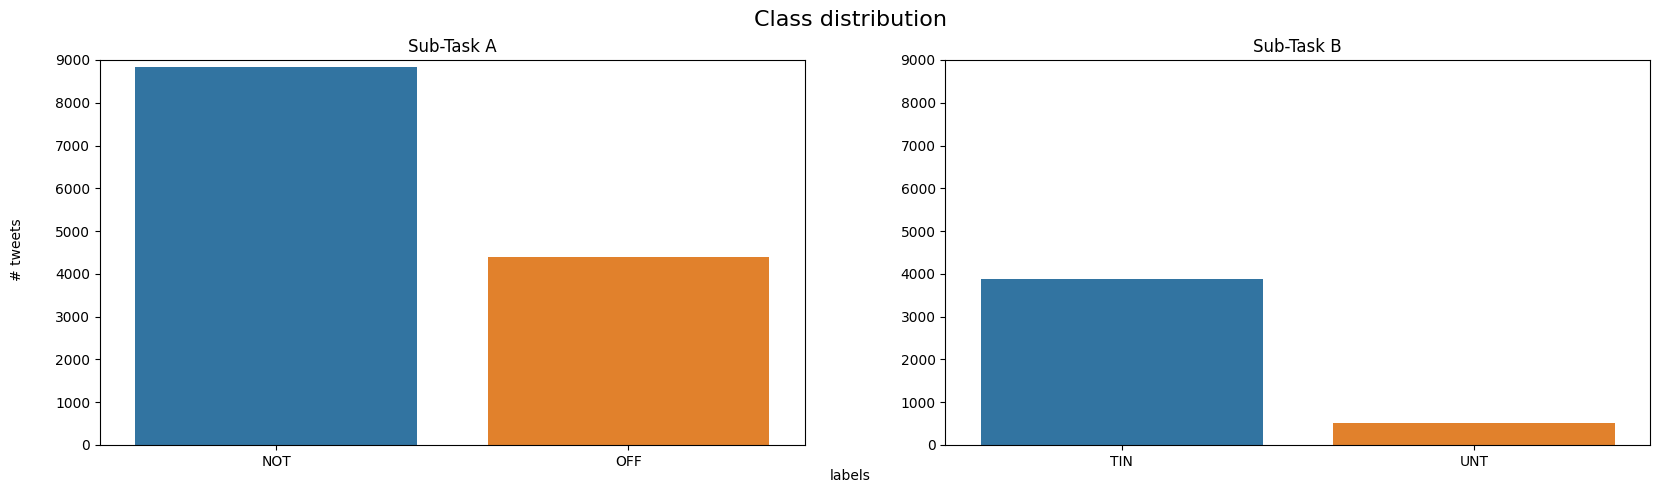

In [ ]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
x=data.subtask_a.value_counts()
sns.barplot(x=x.index, y=x.values, ax=ax1)
ax1.set_title('Sub-Task A')
ax1.set_ylim([0,9000])

x=data.subtask_b.value_counts()
sns.barplot(x=x.index, y=x.values, ax=ax2)
ax2.set_title('Sub-Task B')
ax2.set_ylim([0,9000])



fig.text(0.5, 0.04, 'labels', ha='center')
fig.text(0.08, 0.5, '# tweets', va='center',  rotation='vertical')
fig.suptitle('Class distribution', fontsize=16)


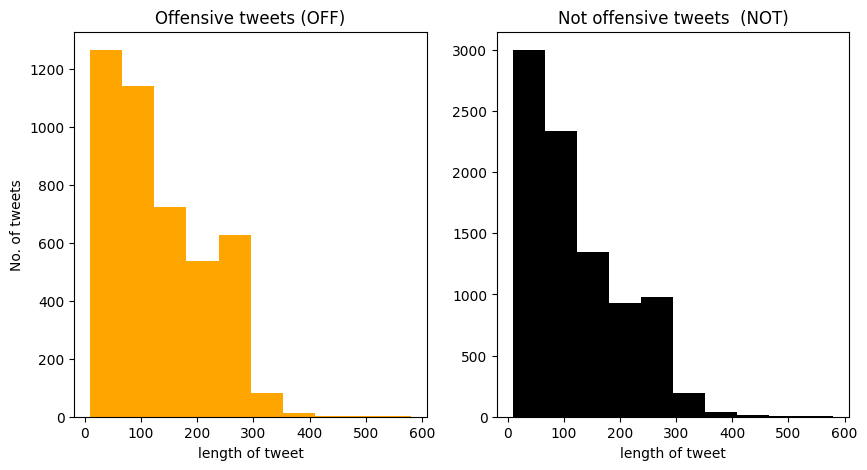

In [ ]:
#Number of characters in tweets
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['subtask_a']=='OFF']['tweet'].str.len()
ax1.hist(tweet_len,color='orange')
ax1.set_ylabel('No. of tweets')
ax1.set_xlabel('length of tweet')
ax1.set_title('Offensive tweets (OFF)')
# ax1.set_ylim([0,3500])

tweet_len=data[data['subtask_a']=='NOT']['tweet'].str.len()
ax2.hist(tweet_len,color='black')
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('length of tweet')

plt.show()

In [ ]:
subtask_a = data['subtask_a'].value_counts().reset_index()
subtask_a

,index,subtask_a
0,NOT,8840
1,OFF,4400


In [ ]:
subtask_b = data['subtask_b'].value_counts().reset_index()
subtask_b

,index,subtask_b
0,TIN,3876
1,UNT,524


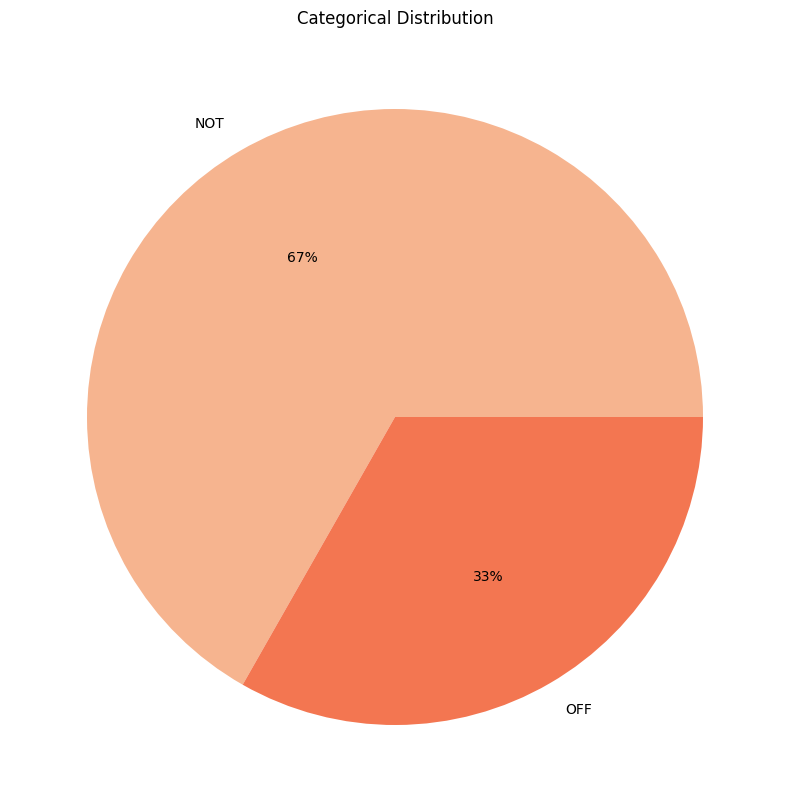

In [ ]:
#Plotting a pie chart to show the category distribution
plt.figure(figsize=(15,10))
plt.pie(subtask_a["subtask_a"], labels=subtask_a["index"],
        colors=sns.color_palette("rocket_r"),autopct='%.0f%%')
plt.title("Categorical Distribution")
plt.show()

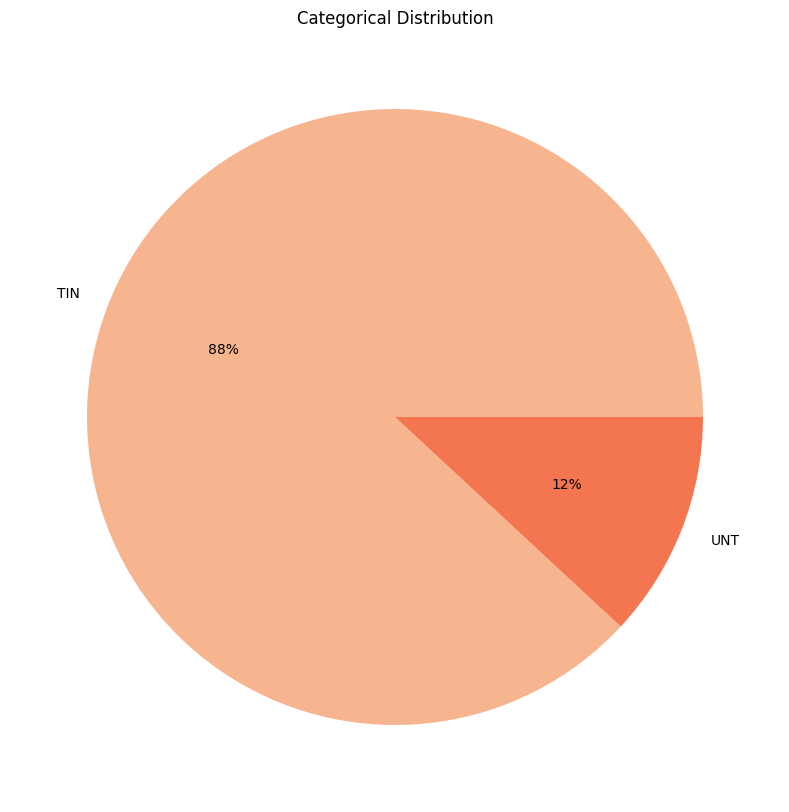

In [ ]:
#Plotting a pie chart to show the category distribution
plt.figure(figsize=(15,10))
plt.pie(subtask_b["subtask_b"], labels=subtask_b["index"],
        colors=sns.color_palette("rocket_r"),autopct='%.0f%%')
plt.title("Categorical Distribution")
plt.show()

## Common Stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from collections import defaultdict
from collections import Counter


def create_corpus(df, label, text,target):
    corpus=[]

    for x in df[df[label]==target][text].str.split():
        for i in x:
            corpus.append(i.lower())
    return corpus

def plot_top_stop(corpus, ax):
    stop=set(stopwords.words('english'))
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    sns.barplot(x=list(x),y=list(y), ax = ax)

def plot_top_punct(corpus, ax):
    dic=defaultdict(int)
    special = string.punctuation
    for i in (corpus):
        if i in special:
            dic[i]+=1

    x,y=zip(*dic.items())
    sns.barplot(x=list(x),y=list(y), ax = ax)

def plot_common_words(corpus, ax, n = 10):
    counter=Counter(corpus)
    stop= stopwords.words('english')
    stop.append('@user')
    stop=set(stop)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:n]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x, ax=ax)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text(0.5, 0.98, 'Common stop words')

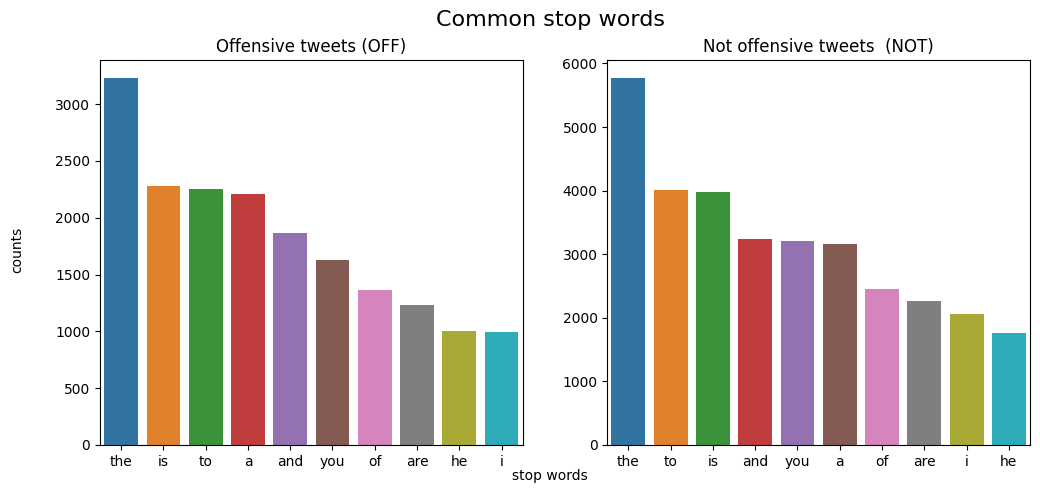

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))


corpus=create_corpus(data, 'subtask_a', 'tweet', 'OFF')
plot_top_stop(corpus, ax1)
ax1.set_title('Offensive tweets (OFF)')
corpus=create_corpus(data, 'subtask_a', 'tweet', 'NOT')
plot_top_stop(corpus,ax=ax2)
ax2.set_title('Not offensive tweets  (NOT)')

fig.text(0.5, 0.04, 'stop words', ha='center')
fig.text(0.05, 0.5, 'counts', va='center',  rotation='vertical')
fig.suptitle('Common stop words', fontsize=16)

## Common punctuations

Text(0.5, 0.98, 'Common punctuations')

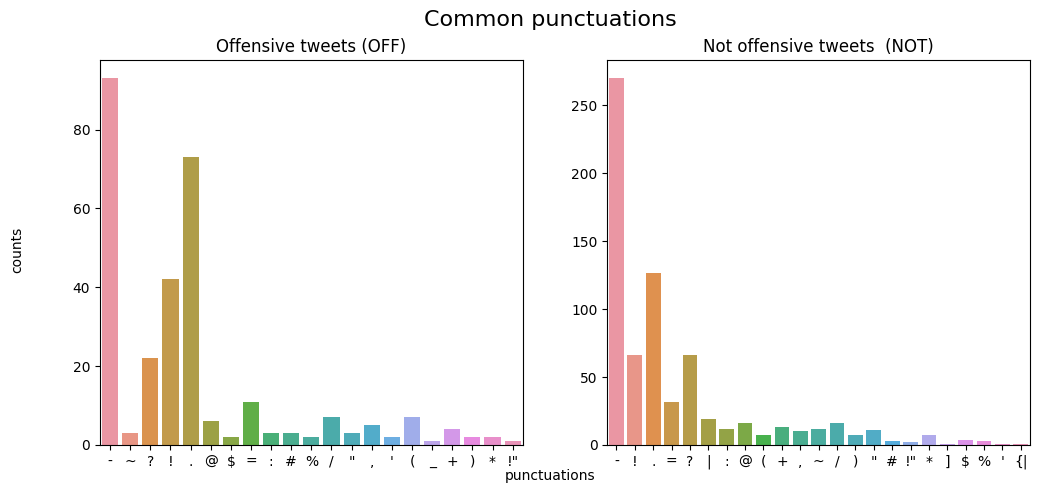

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))


corpus=create_corpus(data, 'subtask_a', 'tweet', 'OFF')
plot_top_punct(corpus, ax=ax1)
ax1.set_title('Offensive tweets (OFF)')

corpus=create_corpus(data, 'subtask_a', 'tweet', 'NOT')
plot_top_punct(corpus, ax=ax2)
ax2.set_title('Not offensive tweets  (NOT)')


fig.text(0.5, 0.04, 'punctuations', ha='center')
fig.text(0.05, 0.5, 'counts', va='center',  rotation='vertical')
fig.suptitle('Common punctuations', fontsize=16)


## Common words

Text(0.5, 0.98, 'Common Words')

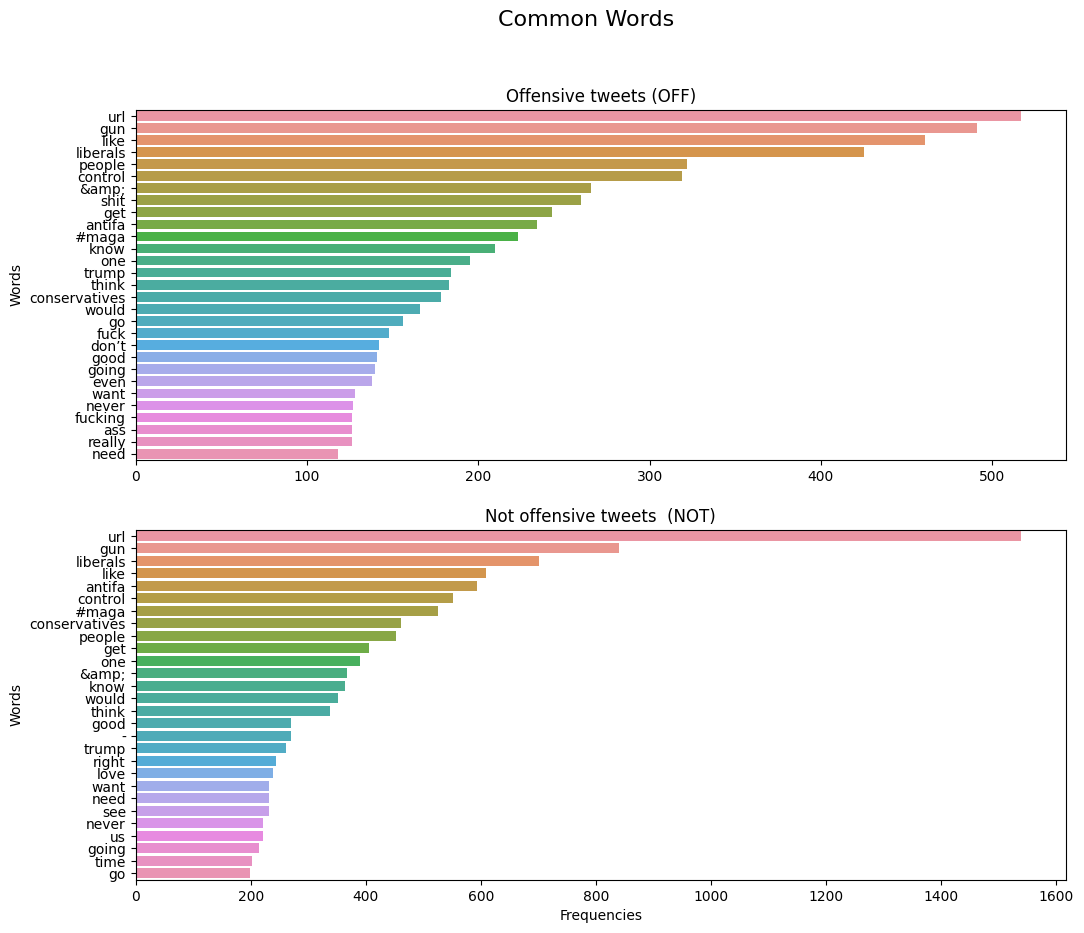

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))

corpus=create_corpus(data, 'subtask_a', 'tweet', 'OFF')
plot_common_words(corpus, ax1, 100)
ax1.set_title('Offensive tweets (OFF)')
# ax1.set_xlabel('# words in a tweet')
ax1.set_ylabel('Words')

corpus=create_corpus(data, 'subtask_a', 'tweet', 'NOT')
plot_common_words(corpus, ax2, 100)
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('Frequencies')
ax2.set_ylabel('Words')

fig.suptitle('Common Words', fontsize=16)

## Data Cleaning
1. Data Cleaning
2. Data encoding

## Data Cleaning

In [ ]:
!pip install spellcheck

  Preparing metadata (setup.py) ... done
  Created wheel for spellcheck: filename=spellcheck-1.0.2-py3-none-any.whl size=1818 sha256=8396510e993403dbbbb2e4de16691aa8c451cc6bba80776bb74082e580e9767d
  Stored in directory: /root/.cache/pip/wheels/7f/48/85/a6d0a67912c6cfa96cb760aae35419eb5eb695d7383ad10c64
Successfully built spellcheck


In [ ]:
from multiprocessing import  Pool

In [ ]:
!pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.6 MB/s eta 0:00:00


In [ ]:
import re
import spellchecker
from spellchecker import SpellChecker

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

### Hashtags
def remove_hashtag(text):
    hashtag=re.compile(r'#\w+')
    return hashtag.sub(r'',text)

### Punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

### Mentions
def remove_mentions(text):
    mention=re.compile(r'@\w+')
    return mention.sub(r'',text)

### URL
def remove_URL(text):
    URL=re.compile(r'URL|&amp')
    return URL.sub(r'',text)

### Spell Checker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def clean_tweets(df):

    df['tweet_cleaned'] = df['tweet'].str.lower().apply(lambda x: remove_emoji(x))\
                                    .apply(lambda x: remove_hashtag(x))\
                                    .apply(lambda x: remove_mentions(x))\
                                    .apply(lambda x: remove_URL(x))\
                                    .apply(lambda x: remove_punct(x))\
                                    .str.strip()
    #                                     .apply(lambda x: correct_spellings(x))\


    return df

def parallelize_cleaning(df, func, n_cores=10):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [ ]:
cleaned_data = parallelize_cleaning(data, clean_tweets)

In [ ]:
%%time
cleaned_data.to_csv('/content/drive/MyDrive/CSE_712_Project/data.csv', index=False)

CPU times: user 191 ms, sys: 7.13 ms, total: 198 ms
Wall time: 476 ms


In [ ]:
!pip install twitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 913.5 kB/s eta 0:00:00


In [ ]:
import twitter

In [ ]:
#Importing the necesasry libraries
# from twitter import TwitterAccess
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin # ???
from sklearn.utils.validation import check_X_y, check_is_fitted # ???
from scipy import sparse #???
from sklearn.linear_model import LogisticRegression


from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Input, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout, Add
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from tqdm import tqdm

In [ ]:
#Utils
def create_corpus(tweets):
    stop=set(stopwords.words('english'))
    corpus=[]
    for tweet in tqdm(tweets):
#         words=[word.lower() for word in nltk.casual_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        words=[word.lower() for word in nltk.casual_tokenize(tweet)]
        corpus.append(words)
    return corpus


def get_embedding_matrix(word_index, num_words, embedding_dim):
    embedding_dict={}
# with open('./data/glove6B/glove.6B.100d.txt','r') as f:
    with open('/content/drive/MyDrive/CSE_712_Project/dataset/glove.twitter.27B.100d.txt','r') as f:
        for line in f:
            values=line.split()
            word=values[0]
            vectors=np.asarray(values[1:],'float32')
            embedding_dict[word]=vectors
    f.close()

    embedding_matrix=np.zeros((num_words,embedding_dim))

    for word,i in tqdm(word_index.items()):
        if i > num_words:
            continue

        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec
    return embedding_matrix

In [ ]:
from keras.utils import pad_sequences

In [ ]:
#Architecture
def architecture(text, nclasses, lr):
    corpus=create_corpus(text)
    tokenizer_obj = Tokenizer()
    tokenizer_obj.fit_on_texts(corpus) #??
    sequences = tokenizer_obj.texts_to_sequences(corpus) #??

    tweet_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

    word_index = tokenizer_obj.word_index
    print('Number of unique words:',len(word_index))

    num_words = len(word_index)+1
    embedding_matrix = get_embedding_matrix(word_index, num_words, embedding_dim)

    # channel 1
    inputs1 = Input(shape=(MAX_LEN), name = "trainable")
    embedding1 = Embedding(num_words,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                       input_length=MAX_LEN,trainable=True)(inputs1)

    convs1 = []
    for fsz in filter_sizes:
        conv = Conv1D(filters=num_filters,
                             kernel_size=fsz,
                             padding='valid',
                             activation='tanh',
                             use_bias = True)(embedding1)

        convs1.append(conv)

    # channel 2
    inputs2 = Input(shape=(MAX_LEN,), name = "fixed")
    embedding2 = Embedding(num_words,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                       input_length=MAX_LEN,trainable=False)(inputs2)
    convs2 = []
    for fsz in filter_sizes:
        conv = Conv1D(filters=num_filters,
                             kernel_size=fsz,
                             padding='valid',
                             activation='tanh',
                             use_bias = True)(embedding2)

        convs2.append(conv)

    pool1 = GlobalMaxPooling1D() (Add()([convs1[0], convs2[0]]))
    pool2 = GlobalMaxPooling1D() (Add()([convs1[1], convs2[1]]))

    out = Concatenate()([pool1, pool2])

    if nclasses >2 :
        outputs = Dense(nclasses, activation='softmax', name = "output")(out)
    else:
        outputs = Dense(1, activation='sigmoid', name = "output")(out)

    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    optimizer = Adam(learning_rate=lr)
    # compile
    if nclasses > 2:
        model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


    model.summary()
    return tweet_pad, model, tokenizer_obj

## Train and Validate

In [ ]:
%%time
def train_validate(X, y, model, threshold_plot = False, batch_size = 512):
    le = LabelEncoder()
    y = le.fit_transform(y)
    if len(le.classes_) > 2:
        y = np_utils.to_categorical(y)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)


    # X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
    print('Shape of train',X_train.shape)
    print("Shape of Validation ",X_valid.shape)
    callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )

    history=model.fit(X_train,y_train,
                      batch_size=batch_size,
                      epochs=30,
                      validation_data=(X_valid,y_valid),
                      shuffle = True,
                      verbose=2,
                     callbacks = [callback])


    proba_valid = model.predict(X_valid)

    proba_train = model.predict(X_train)


    if len(le.classes_) > 2:
        preds_valid = (proba_valid == np.max(proba_valid, axis =1).reshape(-1,1)).astype(int)
        preds_train = (proba_train == np.max(proba_train, axis =1).reshape(-1,1)).astype(int)

    else:
        preds_valid = np.round(proba_valid)
        preds_train = np.round(proba_train)

    print('##### TRAINING DATA #####')
    print(classification_report(y_train, preds_train))
    try:
        print('AUC: ',  roc_auc_score(y_train, proba_train))
    except:
        print('AUC: ',  roc_auc_score(y_train, proba_train, multi_class ='ovr'))

    print('##### VALIDATION DATA #####')
    print(classification_report(y_valid, preds_valid))
    try:
        print('AUC: ',  roc_auc_score(y_valid, proba_valid))
    except:
        print('AUC: ',  roc_auc_score(y_valid, proba_valid, multi_class ='ovr'))

    if threshold_plot:
        thresholds  = []
        scores = []
        for th in range(1,10):
            thresholds.append(th/10)

            scores.append(f1_score(y_valid, proba_valid > (th/10), average = 'macro'))

        plt.plot(thresholds, scores)

    return model

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 12.2 µs


## Test

In [ ]:
%%time
def test(X, y, X_test, y_test, tokenizer_obj, model, threshold = 0.5):
    le = LabelEncoder()
    y = le.fit_transform(y)
    y_test = le.transform(y_test)
    if len(le.classes_) > 2:
        y = np_utils.to_categorical(y)
        y_test = np_utils.to_categorical(y_test)

    corpus_test = create_corpus(X_test)
    sequences_test = tokenizer_obj.texts_to_sequences(corpus_test) #??

    X_test = pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')

    callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )
    history=model.fit(X,y,
                      batch_size=512,
                      epochs=100,
                      validation_data=(X_test,y_test),
                      shuffle = True,
                      verbose=2,
                     callbacks = [callback])



    print(X_test.shape, y_test.shape)
    proba_test = model.predict(X_test)

    if len(le.classes_) > 2:
        preds_test = (proba_test == np.max(proba_test, axis =1).reshape(-1,1)).astype('int')

    else:
        preds_test = (proba_test > threshold).astype('int')

    print('##### TEST DATA #####')
    print(classification_report(y_test, preds_test))
    try:
        print('AUC: ',  roc_auc_score(y_test, proba_test))
    except:
        print('AUC: ',  roc_auc_score(y_test, proba_test, multi_class ='ovr'))

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


## Load Data

In [ ]:
def create_test_dataset(text, labels, out, y_label):

    olid_test = pd.read_csv(text, sep = '\t')
    olid_test_labels = pd.read_csv(labels, header = None)
    olid_test_labels.columns = ['id', y_label]

    olid_test = pd.merge(olid_test, olid_test_labels)
    olid_test_clean = parallelize_cleaning(olid_test, clean_tweets)

    try:
        olid_test_clean['subtask_c_ii'] = olid_test_clean['subtask_c'].apply(lambda x: subtask_cii(x))
        olid_test_clean['subtask_c_iii'] = olid_test_clean['subtask_c'].apply(lambda x: subtask_ciii(x))
    except:
        pass

    olid_test_clean.to_csv(out, index = False)
# olid_testa_labels

create_test_dataset('/content/drive/MyDrive/CSE_712_Project/dataset/testset-levela.tsv', '/content/drive/MyDrive/CSE_712_Project/dataset/labels-levela.csv', '/content/drive/MyDrive/CSE_712_Project/dataset/olid-levela.csv', 'subtask_a')
create_test_dataset('/content/drive/MyDrive/CSE_712_Project/dataset/testset-levelb.tsv', '/content/drive/MyDrive/CSE_712_Project/dataset/labels-levelb.csv', '/content/drive/MyDrive/CSE_712_Project/dataset/olid-levelb.csv', 'subtask_b')


In [ ]:
olid = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/data.csv')
olid_traina = olid[~pd.isna(olid['tweet_cleaned'])]
olid_trainb = olid_traina[~pd.isna(olid_traina['subtask_b'])]
olid_trainc = olid_traina[~pd.isna(olid_traina['subtask_c'])]


olid_testa = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/dataset/olid-levela.csv')
olid_testa = olid_testa[~pd.isna(olid_testa['tweet_cleaned'])]

olid_testb = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/dataset/olid-levelb.csv')
olid_testb = olid_testb[~pd.isna(olid_testb['tweet_cleaned'])]



In [ ]:
%%time
MAX_LEN=50
filter_sizes = (3, 8)
num_filters = 20
embedding_dim = 100
lr = 1e-4

tweet_pada, modela, tokenizer_obj = architecture(olid_traina['tweet_cleaned'], 2,lr)
print(architecture)
modela = train_validate(tweet_pada, olid_traina['subtask_a'], modela, True, 512)
test(tweet_pada, olid_traina['subtask_a'], olid_testa['tweet_cleaned'], olid_testa['subtask_a'], tokenizer_obj, modela)


plot_model(modela, show_shapes=True, to_file='cnn1.png')

100%|██████████| 13239/13239 [00:01<00:00, 7460.59it/s]


Number of unique words: 19064


100%|██████████| 19064/19064 [00:00<00:00, 225530.36it/s]


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 trainable (InputLayer)         [(None, 50)]         0           []                               
                                                                                                  
 fixed (InputLayer)             [(None, 50)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 100)      1906500     ['trainable[0][0]']              
                                                                                                  
 embedding_3 (Embedding)        (None, 50, 100)      1906500     ['fixed[0][0]']                  
                                                                                            

ValueError: ignored

## Glove LSTM

In [ ]:
def create_corpus(tweets):
    stop=set(stopwords.words('english'))
    corpus=[]
    for tweet in tqdm(tweets):
#         words=[word.lower() for word in nltk.casual_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        words=[word.lower() for word in nltk.casual_tokenize(tweet)]
        corpus.append(words)
    return corpus

corpus=create_corpus(cleaned_data['tweet_cleaned'])

embedding_dict={}
# with open('./data/glove6B/glove.6B.100d.txt','r') as f:
with open('/content/drive/MyDrive/CSE_712_Project/dataset/glove.twitter.27B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus) #??
sequences=tokenizer_obj.texts_to_sequences(corpus) #??

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec


model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=True)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

model.summary()

100%|██████████| 13240/13240 [00:06<00:00, 2090.44it/s]


Number of unique words: 19064


100%|██████████| 19064/19064 [00:00<00:00, 403425.84it/s]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           1906500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,948,805
Trainable params: 1,948,805
Non-trainable params: 0
_________________________________________________________________


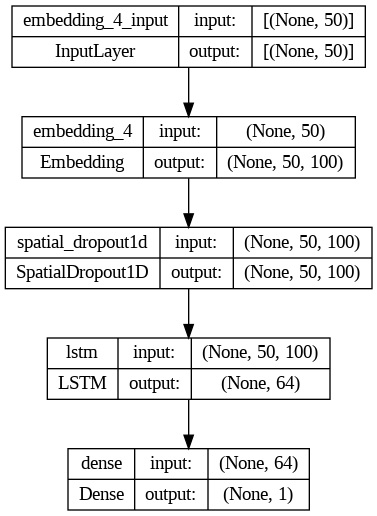

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
le = LabelEncoder()
y = le.fit_transform(olid['subtask_a'])

X_train, X_valid, y_train, y_valid = train_test_split(tweet_pad, y, test_size=0.33, random_state=42)



# X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_valid.shape)
callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )

history=model.fit(X_train,y_train,
                  batch_size=512,
                  epochs=30,
                  validation_data=(X_valid,y_valid),
                  shuffle = True,
                  verbose=2,
                 callbacks = [callback])

preds_valid = np.round(model.predict(X_valid))
proba_valid = model.predict_proba(X_valid)
preds_train = np.round(model.predict(X_train))
proba_train = model.predict_proba(X_train)

print(classification_report(y_train, preds_train))
print('AUC: ', roc_auc_score(y_train, proba_train))

print(classification_report(y_valid, preds_valid))
print('AUC: ',  roc_auc_score(y_valid, proba_valid))

Shape of train (8870, 50)
Shape of Validation  (4370, 50)
Epoch 1/30
18/18 - 24s - loss: 0.6906 - accuracy: 0.6274 - val_loss: 0.6863 - val_accuracy: 0.6625 - 24s/epoch - 1s/step
Epoch 2/30
18/18 - 12s - loss: 0.6826 - accuracy: 0.6679 - val_loss: 0.6790 - val_accuracy: 0.6643 - 12s/epoch - 646ms/step
Epoch 3/30
18/18 - 13s - loss: 0.6741 - accuracy: 0.6689 - val_loss: 0.6702 - val_accuracy: 0.6643 - 13s/epoch - 720ms/step
Epoch 4/30
18/18 - 14s - loss: 0.6628 - accuracy: 0.6698 - val_loss: 0.6579 - val_accuracy: 0.6643 - 14s/epoch - 753ms/step
Epoch 5/30
18/18 - 14s - loss: 0.6462 - accuracy: 0.6697 - val_loss: 0.6444 - val_accuracy: 0.6643 - 14s/epoch - 750ms/step
Epoch 6/30
18/18 - 14s - loss: 0.6349 - accuracy: 0.6702 - val_loss: 0.6373 - val_accuracy: 0.6638 - 14s/epoch - 750ms/step
Epoch 7/30
18/18 - 13s - loss: 0.6302 - accuracy: 0.6713 - val_loss: 0.6311 - val_accuracy: 0.6643 - 13s/epoch - 736ms/step
Epoch 8/30
